In [2]:
!pip install -Uqq pycid

In [3]:
import pycid
import numpy as np
import torch

In [4]:
torch.cuda.is_available()

True

A CID is a graph wit nodes and edges.

Nodes:

   + Mn = Model n
   + C = Context
   + I = User Input
   + O = Output

In [101]:
cid  = pycid.CID(
    [
        ("C", "M1"),
        ("I", "C"),
        ("I", "M1"),
        ("M1", "O")
    ],
    decisions=["M1"],
    utilities=["O"]
)

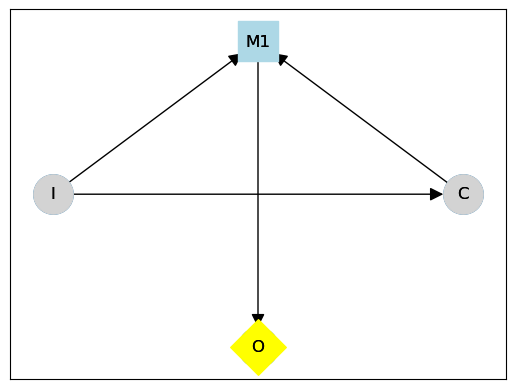

In [102]:
cid.draw()

Variant 1 where the user's question is ommitted from the context of agents M2-M6.

In [67]:
pycid.CID?

Init signature:
pycid.CID(
    edges: 'Optional[Iterable[Tuple[str, str]]]' = None,
    decisions: 'Optional[List[str]]' = None,
    utilities: 'Optional[List[str]]' = None,
    **kwargs: 'Any',
)
Docstring:      A Causal Influence Diagram
Init docstring:
Initialize a Causal Influence Diagram

Parameters
----------
edges: A set of directed edges. Each is a pair of node labels (tail, head).

decisions: The decision nodes of the agent.

utilities: The utility nodes of the agent.
File:           ~/miniconda3/envs/fastai/lib/python3.10/site-packages/pycid/core/cid.py
Type:           type
Subclasses:     


In [83]:
variant_1  = pycid.CID(
    [
        ("C", "M1"),
        ("C", "M2"),
        ("C", "M3"),
        ("C", "M4"),
        ("C", "M5"),
        ("C", "M6"),
        ("C", "M7"),
        ("I", "C"),
        ("I", "M1"),
        ("I", "M7"),
        ("M1", "M2"),
        ("M1", "M3"),
        ("M1", "M4"),
        ("M1", "M5"),
        ("M1", "M6"),
        ("M2", "M7"),
        ("M3", "M7"),
        ("M4", "M7"),
        ("M5", "M7"),
        ("M6", "M7"),
        ("M7", "O"),
    ],
    decisions=["M1", "M2", "M3", "M4", "M5", "M6", "M7"],
    utilities=["O"]
)

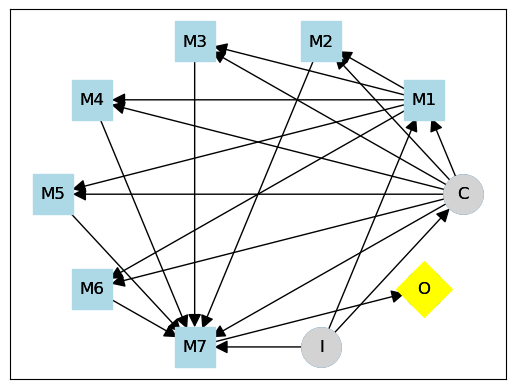

In [84]:
variant_1.draw()

Variant 2 where the user's question is included in the context of all sub-agents.

In [85]:
variant_2  = pycid.CID(
    [
        ("C", "M1"),
        ("C", "M2"),
        ("C", "M3"),
        ("C", "M4"),
        ("C", "M5"),
        ("C", "M6"),
        ("C", "M7"),
        ("I", "C"),
        ("I", "M1"),
        ("I", "M2"),
        ("I", "M3"),
        ("I", "M4"),
        ("I", "M5"),
        ("I", "M6"),
        ("I", "M7"),
        ("M1", "M2"),
        ("M1", "M3"),
        ("M1", "M4"),
        ("M1", "M5"),
        ("M1", "M6"),
        ("M2", "M7"),
        ("M3", "M7"),
        ("M4", "M7"),
        ("M5", "M7"),
        ("M6", "M7"),
        ("M7", "O"),
    ],
    decisions=["M1", "M2", "M3", "M4", "M5", "M6", "M7"],
    utilities=["O"]
)

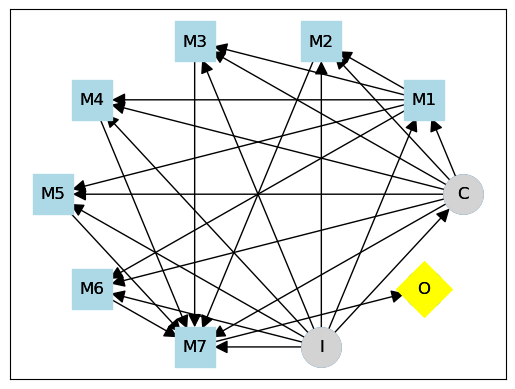

In [86]:
variant_2.draw()

(SV1) Variant 3 where the input is included in all agents M1-M7, but has an issue with data duplication/copying in the prompt. How would you fix it? (Answer below)
It has a second error, in that the path (I, C) is missing.

In [91]:
variant_3_dupes  = pycid.CID(
    [
        ("C", "M1"),
        ("C", "M2"),
        ("C", "M3"),
        ("C", "M4"),
        ("C", "M5"),
        ("C", "M6"),
        ("C", "M7"),
        ("I", "M1"),
        ("I", "M2"),
        ("I", "M3"),
        ("I", "M4"),
        ("I", "M5"),
        ("I", "M6"),
        ("I", "M7"),
        ("M1", "M2"),
        ("M1", "M3"),
        ("M1", "M4"),
        ("M1", "M5"),
        ("M1", "M6"),
        ("M2", "M3"),
        ("M2", "M7"),
        ("M3", "M4"),
        ("M3", "M7"),
        ("M4", "M5"),
        ("M4", "M7"),
        ("M5", "M6"),
        ("M5", "M7"),
        ("M6", "M7"),
        ("M7", "O"),
    ],
    decisions=["M1", "M2", "M3", "M4", "M5", "M6", "M7"],
    utilities=["O"]
)

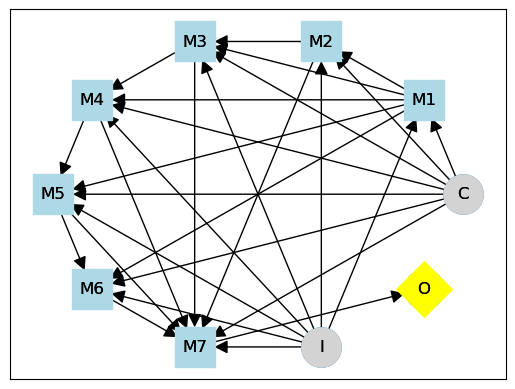

In [92]:
variant_3_dupes.draw()

Answer (don't peek!):

(SV1) Variant 3 with the data duplication error fixed

In [109]:
variant_3_correct  = pycid.CID(
    [
        ("C", "M1"),
        ("C", "M2"),
        ("C", "M3"),
        ("C", "M4"),
        ("C", "M5"),
        ("C", "M6"),
        ("C", "M7"),
        ("I", "C"),
        ("I", "M1"),
        ("I", "M7"),
        ("M1", "M2"),
        ("M1", "M3"),
        ("M1", "M4"),
        ("M1", "M5"),
        ("M1", "M6"),
        ("M5", "M6"),
        ("M2", "M3"),
        ("M3", "M4"),
        ("M4", "M5"),
        ("M5", "M6"),
        ("M6", "M7"),
        ("M7", "O"),
    ],
    decisions=["M1", "M2", "M3", "M4", "M5", "M6", "M7"],
    utilities=["O"]
)

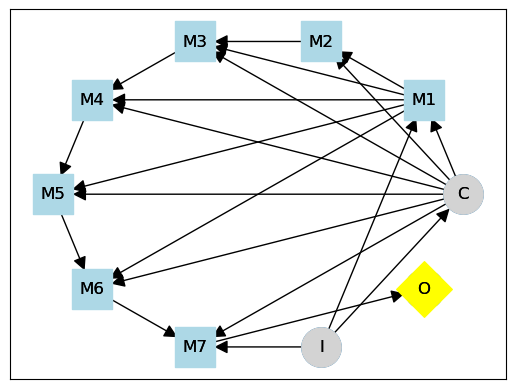

In [110]:
variant_3_correct.draw()

In [97]:
variant_4  = pycid.CID(
    [
        ("C", "M1"),
        ("C", "M2"),
        ("C", "M3"),
        ("C", "M4"),
        ("C", "M5"),
        ("C", "M6"),
        ("C", "M7"),
        ("I", "C"),
        ("I", "M1"),
        ("I", "M7"),
        ("M1", "M2"),
        ("M1", "M3"),
        ("M1", "M4"),
        ("M1", "M5"),
        ("M1", "M6"),
        ("M5", "M6"),
        ("M2", "M3"),
        ("M3", "M4"),
        ("M4", "M5"),
        ("M5", "M6"),
        ("M6", "M7"),
        ("M7", "O"),
    ],
    decisions=["M1", "M2", "M3", "M4", "M5", "M6", "M7"],
    utilities=["O"]
)

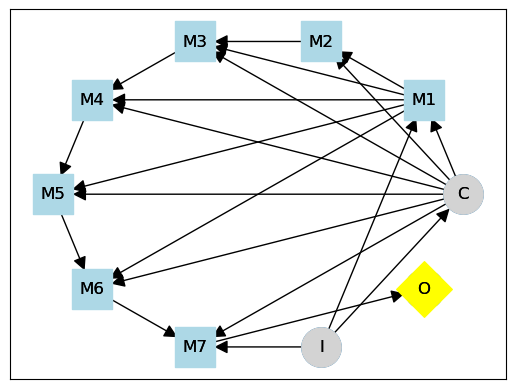

In [98]:
variant_4.draw()

In [99]:
variant_6  = pycid.CID(
    [
        ("C", "M1"),
        ("C", "M2"),
        ("C", "M3"),
        ("C", "M4"),
        ("C", "M5"),
        ("C", "M6"),
        ("C", "M7"),
        ("I", "C"),
        ("I", "M1"),
        ("I", "M2"),
        ("I", "M3"),
        ("I", "M4"),
        ("I", "M5"),
        ("I", "M6"),
        ("I", "M7"),
        ("M1", "M2"),
        ("M1", "M3"),
        ("M1", "M4"),
        ("M1", "M5"),
        ("M5", "M6"),
        ("M1", "M6"),
        ("M2", "M3"),
        ("M3", "M4"),
        ("M4", "M5"),
        ("M5", "M6"),
        ("M6", "M7"),
        ("M7", "O"),
    ],
    decisions=["M1", "M2", "M3", "M4", "M5", "M6", "M7"],
    utilities=["O"]
)

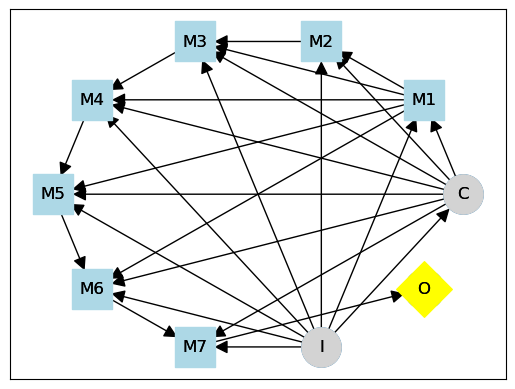

In [100]:
variant_6.draw()

Variant 7 - Each agent is free to search for (and filter the validity of) extra context in order to augment the generation of the next answer.

In [103]:
variant_7  = pycid.CID(
    [
        ("C1", "M1"),
        ("C1", "M2"),
        ("C1", "M3"),
        ("C1", "M4"),
        ("C1", "M5"),
        ("C1", "M6"),
        ("C1", "M7"),
        ("C1", "M2"),
        ("C2", "M3"),
        ("C3", "M4"),
        ("C4", "M5"),
        ("C5", "M6"),
        ("C6", "M7"),
        ("I", "C1"),
        ("I", "M1"),
        ("I", "M2"),
        ("I", "M3"),
        ("I", "M4"),
        ("I", "M5"),
        ("I", "M6"),
        ("I", "M7"),
        ("M1", "M2"),
        ("M1", "M3"),
        ("M1", "M4"),
        ("M1", "M5"),
        ("M1", "M6"),
        ("M5", "M6"),
        ("M2", "M3"),
        ("M3", "M4"),
        ("M4", "M5"),
        ("M5", "M6"),
        ("M6", "M7"),
        ("M7", "O"),
    ],
    decisions=["M1", "M2", "M3", "M4", "M5", "M6", "M7"],
    utilities=["O"]
)

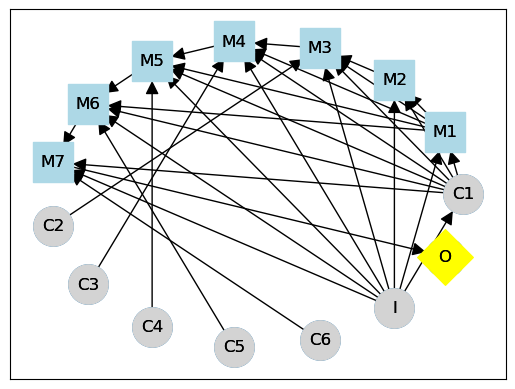

In [104]:
variant_7.draw()

Variant 8 - sequential pair of agents. Agent M1 is instructed to ask a related question that can help answer the user's question I. The second agent M2 takes agent M1's output and the context from the user search, .

In [107]:
variant_8  = pycid.CID(
    [
        ("I", "C"),
        ("I", "M1"),
        ("C", "M1"),
        ("C", "M2"),
        ("M1", "M2"),
        ("M2", "O"),
    ],
    decisions=["M1", "M2"],
    utilities=["O"]
)

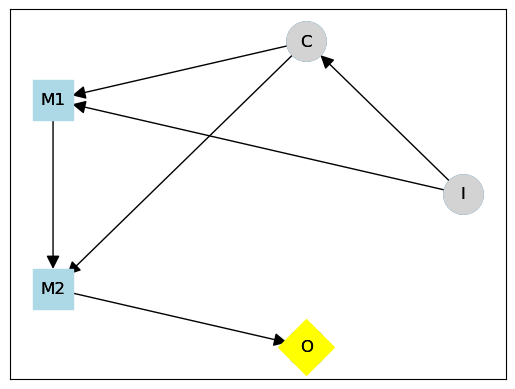

In [108]:
variant_8.draw()

In [122]:
variant_8_correct  = pycid.CID(
    [
        ("I", "C"),
        ("I", "M1"),
        ("I", "M2"),
        ("C", "M1"),
        ("C", "M2"),
        ("M1", "M2"),
        ("M2", "O"),
    ],
    decisions=["M1", "M2"],
    utilities=["O"]
)

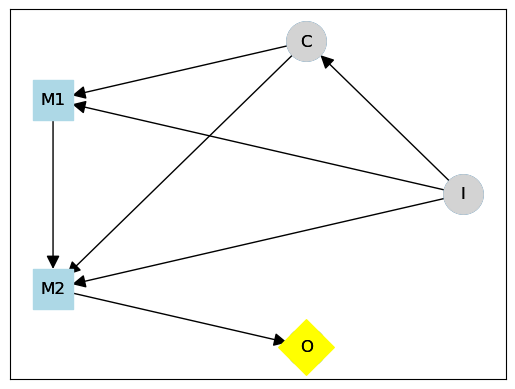

In [123]:
variant_8_correct.draw()

We want to think about parallel agents as well, primarily due to latency.

Variant 9 - Pair of parallel agents.

In [124]:
variant_9  = pycid.CID(
    [
        ("I", "C"),
        ("I", "M1"),
        ("I", "M2"),
        ("C", "M1"),
        ("C", "M2"),
        ("M1", "O"),
        ("M2", "O"),
    ],
    decisions=["M1", "M2"],
    utilities=["O"]
)

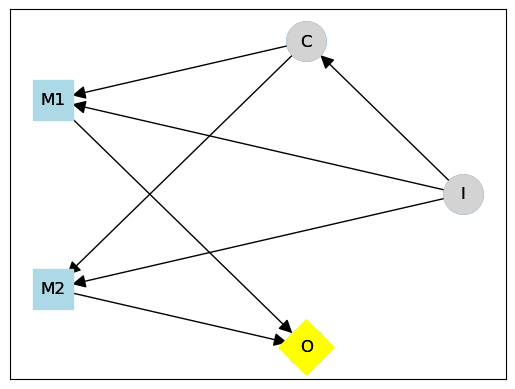

In [125]:
variant_9.draw()

This case breaks down a bit here because for interface reasons we wouldn't want output from two models stored in a data store and shown to the user, we instead want output from one model that aggregates, modifies or otherwise filters M1 and M2's responses. If both M1 and M2 are wrong, we have two wrong answers. That seems much worse.

Here's variant 9 updated to add a third agent to aggregate the output from parallel agents. This seems like a rule. If you want parallel agents, you don't want 2 agents, you want 3 agents. Also, parallel agents involve at least two sequential steps.

In [118]:
variant_10  = pycid.CID(
    [
        ("I", "C"),
        ("I", "M1"),
        ("I", "M2"),
        ("I", "M3"),
        ("C", "M1"),
        ("C", "M2"),
        ("M1", "M3"),
        ("M2", "M3"),
        ("C", "M3"),
        ("M3", "O"),
    ],
    decisions=["M1", "M2", "M3"],
    utilities=["O"]
)

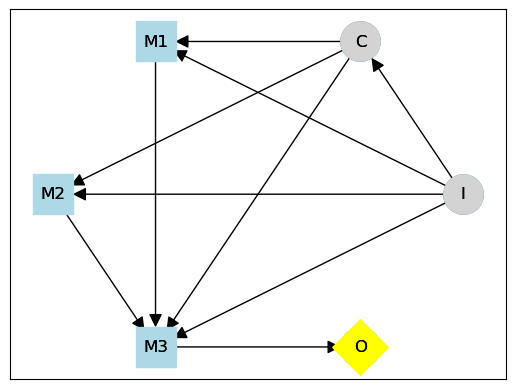

In [119]:
variant_10.draw()

Variant with a ranking step after M1 and M2

In [136]:
variant_10_rank  = pycid.CID(
    [
        ("I", "C"),
        ("I", "M1"),
        ("I", "M2"),
        ("I", "M3"),
        ("C", "M1"),
        ("C", "M2"),
        ("I", "RANK"),
        ("M1", "RANK"),
        ("M2", "RANK"),
        ("RANK", "M3"),
        ("C", "M3"),
        ("M3", "O"),
    ],
    decisions=["M1", "M2", "M3", "RANK"],
    utilities=["O"]
)

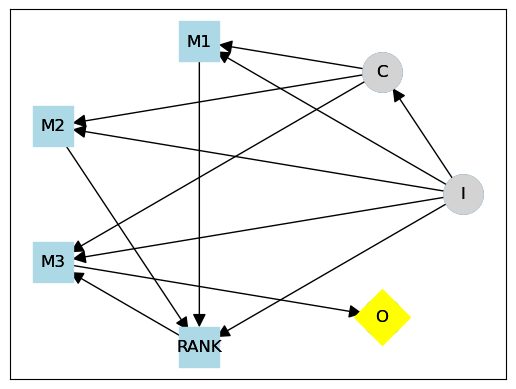

In [137]:
variant_10_rank.draw()

In [134]:
variant_10_omit  = pycid.CID(
    [
        ("I", "C"),
        ("I", "M3"),
        ("C", "M1"),
        ("C", "M2"),
        ("M1", "M3"),
        ("M2", "M3"),
        ("C", "M3"),
        ("M3", "O"),
    ],
    decisions=["M1", "M2", "M3"],
    utilities=["O"]
)

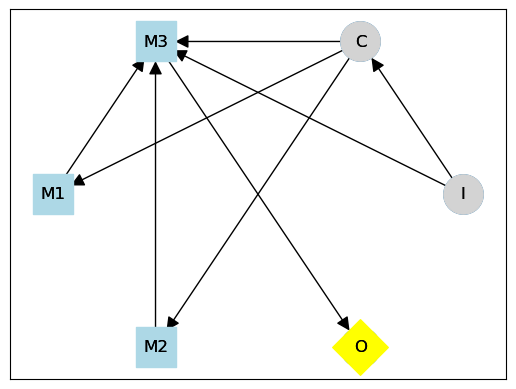

In [135]:
variant_10_omit.draw()